# Assignment 3: Non-Linear Models and Validation Metrics (37 total marks)
### Due: October 24 at 11:59pm

### Name: Aemen Mohsin

### In this assignment, you will need to write code that uses non-linear models to perform classification and regression tasks. You will also be asked to describe the process by which you came up with the code. More details can be found below. Please cite any websites or AI tools that you used to help you with this assignment.

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Part 1: Regression (14.5 marks)

For this section, we will be continuing with the concrete example from yellowbrick. You will need to compare these results to the results from the previous assignment. Please use the results from the solution if you were unable to complete Assignment 2

### Step 1: Data Input (0.5 marks)

The data used for this task can be downloaded using the yellowbrick library: 
https://www.scikit-yb.org/en/latest/api/datasets/concrete.html

Use the yellowbrick function `load_concrete()` to load the concrete dataset into the feature matrix `X` and target vector `y`.

In [6]:
# TO DO: Import concrete dataset from yellowbrick library

from yellowbrick.datasets import load_concrete
X, y = load_concrete()

### Step 2: Data Processing (0 marks)

Data processing was completed in the previous assignment. No need to repeat here.

### Step 3: Implement Machine Learning Model

1. Import the Decision Tree, Random Forest and Gradient Boosting Machines regression models from sklearn
2. Instantiate the three models with `max_depth = 5`. Are there any other parameters that you will need to set?
3. Implement each machine learning model with `X` and `y`

### Step 4: Validate Model

Calculate the average training and validation accuracy using mean squared error with cross-validation. To do this, you will need to set `scoring='neg_mean_squared_error'` in your `cross_validate` function and negate the results (multiply by -1)

### Step 5: Visualize Results (4 marks)

1. Create a pandas DataFrame `results` with columns: Training accuracy and Validation accuracy, and index: DT, RF and GB
2. Add the accuracy results to the `results` DataFrame
3. Print `results`

In [16]:
# TO DO: ADD YOUR CODE HERE FOR STEPS 3-5
# Note: for any random state parameters, you can use random_state = 0
# HINT: USING A LOOP TO STORE THE DATA IN YOUR RESULTS DATAFRAME WILL BE MORE EFFICIENT

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, mean_squared_error

# Creating a training and testing split (train - 80%, test - 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=0)

# Instantiate and fit models with parameters: max_depth = 5, random_state = 0

# Decision Tree
tree = DecisionTreeRegressor(max_depth=5, random_state=0)
tree.fit(X_train, y_train)

# Creating validation model
scores_tree = cross_validate(tree, X_train, y_train, cv=5, 
                        scoring='neg_mean_squared_error',
                       return_train_score=True)

# Creating data for training and validation
for label_pair in [ ('train_score', 'train_score')]:
    train1 = (-scores_tree[label_pair[0]].mean())
for label_pair in [ ('test_score', 'validation_score')]:
    val1 = (-scores_tree[label_pair[0]].mean())

# Random Forest
forest = RandomForestRegressor(max_depth=5, random_state=0)
forest.fit(X_train, y_train)

# Creating validation model
scores_forest = cross_validate(forest, X_train, y_train, cv=5, 
                        scoring='neg_mean_squared_error',
                       return_train_score=True)

# Creating data for training and validation
for label_pair in [ ('train_score', 'train_score')]:
    train2 = (-scores_forest[label_pair[0]].mean())
for label_pair in [ ('test_score', 'validation_score')]:
    val2 = (-scores_forest[label_pair[0]].mean())

# Gradient Boosting
gbrt = GradientBoostingRegressor(max_depth=5, random_state=0)
gbrt.fit(X_train, y_train)

# Creating validation model
scores_gbrt = cross_validate(gbrt, X_train, y_train, cv=5, 
                        scoring='neg_mean_squared_error',
                       return_train_score=True)

# Creating data for training and validation
for label_pair in [ ('train_score', 'train_score')]:
    train3 = (-scores_gbrt[label_pair[0]].mean())
for label_pair in [ ('test_score', 'validation_score')]:
    val3 = (-scores_gbrt[label_pair[0]].mean())
    
# Creating the Dataframe
data = {'Training Accuracy': [train1, train2, train3],
            'Validation Accuracy': [val1, val2, val3]}
results = pd.DataFrame(data, index=['DT', 'RF', 'GB'])
print(results)


    Training Accuracy  Validation Accuracy
DT          47.822974            74.045335
RF          30.296363            47.614708
GB           3.694308            23.546500


Repeat the step above to print the R2 score instead of the mean-squared error. For this case, you can use `scoring='r2'`

In [18]:
# TO DO: ADD YOUR CODE HERE

# Decision Tree
# Creating validation model
scores_tree = cross_validate(tree, X_train, y_train, cv=5, 
                        scoring='r2',
                       return_train_score=True)

# Creating data for training and validation
for label_pair in [ ('train_score', 'train_score')]:
    train1 = (scores_tree[label_pair[0]].mean())
for label_pair in [ ('test_score', 'validation_score')]:
    val1 = (scores_tree[label_pair[0]].mean())

# Random Forest
# Creating validation model
scores_forest = cross_validate(forest, X_train, y_train, cv=5, 
                        scoring='r2',
                       return_train_score=True)

# Creating data for training and validation
for label_pair in [ ('train_score', 'train_score')]:
    train2 = (scores_forest[label_pair[0]].mean())
for label_pair in [ ('test_score', 'validation_score')]:
    val2 = (scores_forest[label_pair[0]].mean())

# Gradient Boosting
# Creating validation model
scores_gbrt = cross_validate(gbrt, X_train, y_train, cv=5, 
                        scoring='r2',
                       return_train_score=True)

# Creating data for training and validation
for label_pair in [ ('train_score', 'train_score')]:
    train3 = (scores_gbrt[label_pair[0]].mean())
for label_pair in [ ('test_score', 'validation_score')]:
    val3 = (scores_gbrt[label_pair[0]].mean())
    
# Creating the Dataframe
data = {'Training Accuracy': [train1, train2, train3],
            'Validation Accuracy': [val1, val2, val3]}
results = pd.DataFrame(data, index=['DT', 'RF', 'GB'])
print(results)

    Training Accuracy  Validation Accuracy
DT           0.830437             0.735184
RF           0.892634             0.830004
GB           0.986903             0.916155


### Questions (6 marks)
1. How do these results compare to the results using a linear model in the previous assignment? Use values.
1. Out of the models you tested, which model would you select for this dataset and why?
1. If you wanted to increase the accuracy of the tree-based models, what would you do? Provide two suggestions.

#### Answers

1. When comparing these results to the linear model, they yeilded much better results. The mean squared error should be close to 0 and this time it was much lower compared to the linear models. When using linear regression, the model yielded a score of 110.345501 for training and 95.635335 for validation. When using the decision tree, training was 47.822974 and validation was 74.045335. For random forest, the training score was 30.296363 and validation was 47.614708. Lastly, for gradient boosting, the training score was 3.694308 and validation score was 23.546500. The errors were lower for all three non-linear models, however, they could havae been overfitted since the mse for training was much lower than validation. When looking at R2 scores, for linear regression, the training score was 0.609071 and validation was 0.636898. When using the decision tree, training was 0.830437 and validation was 0.735184. For random forest, the training score was 0.982634 and validation was 0.830004. Lastly, for gradient boosting, the training score was 0.986903 and validation score was 0.916155. These scores should be close to 1, so they were much improved compared to the linear model. These R2 scores were much closer in training and accuracry compared to mean squared error.

2. Out of the models tested, I would select gradient boosting, since the mse was the closest to 0 and the R2 score was very close to 1. I might try to reduce the depth for this model since the difference between the training and validation score does indicate some overfitting.

3. My first suggestion would be to pre-prune the tree or decrease the depth of the models since they seem to be a bit overfitted. My second suggestion would be to post-prune the tree or remove collapsing nodes that don't have much information in them. Both of these would prevent overfitting the tree.


### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

*DESCRIBE YOUR PROCESS HERE*

1. The source code was derived mainly from the lecture examples: Decision Trees, Decision Trees Examples and Ensembles. The only additional resource was to get the cross-validation portion correct for mse which was a bit unclear. For this, stack exchange was used: https://stackoverflow.com/questions/48244219/is-sklearn-metrics-mean-squared-error-the-larger-the-better-negated
2. The steps were completed in the order they were asked.
3. No generative AI was necessary since the lecture code and internet was simple enough to easily modify.
4. The only challenge faced was using cross-validation with mean squared error since I was unsure how to actually accomplish that using lecture material. For this I had to consult stack exchange.

## Part 2: Classification (17.5 marks)

You have been asked to develop code that can help the user classify different wine samples. Following the machine learning workflow described in class, write the relevant code in each of the steps below:

### Step 1: Data Input (2 marks)

The data used for this task can be downloaded from UCI: https://archive.ics.uci.edu/dataset/109/wine

Use the pandas library to load the dataset. You must define the column headers if they are not included in the dataset 

You will need to split the dataset into feature matrix `X` and target vector `y`. Which column represents the target vector?

Print the size and type of `X` and `y`

In [103]:
# TO DO: Import wine dataset

def load_wine():
    '''Load and pre-process wine data
    
    it will be downloaded from
    https://archive.ics.uci.edu/dataset/109/wine/wine.data
    
    return: data(DataFrame)
    
    '''
    
    import os
    import requests
    
    
    file_url = 'https://archive.ics.uci.edu/dataset/109/wine/wine.data'
    file_name = file_url.split('/')[-1]
    
    if not os.path.isfile(file_name):
        print('Downloading from {}'.format(file_url))
        r = requests.get(file_url)
        with open(file_name,'wb') as output_file:
            output_file.write(r.content)
        
    data = pd.read_csv(file_name, sep=',', names= ['Class', 'Alcohol', 'Malic Acid', 'Ash', 'Alcalinity of Ash', 
                'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid Phenols', 
                'Proanthocyanins', 'Color Intensity', 'Hue', 'OD280/OD315 of Diluted Wines',
                'Proline'])
    return data

# Method to load data if file in directory:
#data = pd.read_csv('wine.data', sep=',')
#df = pd.DataFrame(data)
#df.columns = ['Class', 'Alcohol', 'Malic Acid', 'Ash', 'Alcalinity of Ash', 
                # 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid Phenols', 
                # 'Proanthocyanins', 'Color Intensity', 'Hue', 'OD280/OD315 of Diluted Wines',
                # 'Proline']
            
data = load_wine()
#print(data.info())

# Creating feature matrix and target vector (class) to determine each of the 3 wines
X = data.drop(columns='Class')
y = data['Class']
print(X.shape)
print(y.shape)
print(X.dtypes)
print(y.dtypes)

(178, 13)
(178,)
Alcohol                         float64
Malic Acid                      float64
Ash                             float64
Alcalinity of Ash               float64
Magnesium                         int64
Total phenols                   float64
Flavanoids                      float64
Nonflavanoid Phenols            float64
Proanthocyanins                 float64
Color Intensity                 float64
Hue                             float64
OD280/OD315 of Diluted Wines    float64
Proline                           int64
dtype: object
int64


### Step 2: Data Processing (1.5 marks)

Print the first five rows of the dataset to inspect:

In [104]:
# TO DO: ADD YOUR CODE HERE
data.head(5)

,Class,Alcohol,Malic Acid,Ash,Alcalinity of Ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid Phenols,Proanthocyanins,Color Intensity,Hue,OD280/OD315 of Diluted Wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


Check to see if there are any missing values in the dataset. If necessary, select an appropriate method to fill-in the missing values

In [105]:
# TO DO: ADD YOUR CODE HERE
data.isnull().sum()

Class                           0
Alcohol                         0
Malic Acid                      0
Ash                             0
Alcalinity of Ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid Phenols            0
Proanthocyanins                 0
Color Intensity                 0
Hue                             0
OD280/OD315 of Diluted Wines    0
Proline                         0
dtype: int64

How many samples do we have of each type of wine?

In [106]:
# TO DO: ADD YOUR CODE HERE
print("Class 1: ", len(data[data.Class == 1]))
print("Class 2: ", len(data[data.Class == 2]))
print("Class 3: ", len(data[data.Class == 3]))

Class 1:  59
Class 2:  71
Class 3:  48


### Step 3: Implement Machine Learning Model

1. Import `SVC` and `DecisionTreeClassifier` from sklearn
2. Instantiate models as `SVC()` and `DecisionTreeClassifier(max_depth = 3)`
3. Implement the machine learning model with `X` and `y`

### Step 4: Validate Model 

Calculate the average training and validation accuracy using `cross_validate` for the two different models listed in Step 3. For this case, use `scoring='accuracy'`

### Step 5: Visualize Results (4 marks)

#### Step 5.1: Compare Models
1. Create a pandas DataFrame `results` with columns: Training accuracy and Validation accuracy
2. Add the data size, training and validation accuracy for each dataset to the `results` DataFrame
3. Print `results`

In [115]:
# TO DO: ADD YOUR CODE HERE FOR STEPS 3-5
# Note: for any random state parameters, you can use random_state = 0
# HINT: USING A LOOP TO STORE THE DATA IN YOUR RESULTS DATAFRAME WILL BE MORE EFFICIENT

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Creating a training and testing split (train - 80%, test - 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=0)

# Instantiating models
svc = SVC()
tree = DecisionTreeClassifier(max_depth=3, random_state=0)

# Fitting models
svc.fit(X_train, y_train)
tree.fit(X_train, y_train)

# Creating validation model
# SVC
scores_svc = cross_validate(svc, X_train, y_train, cv=5, 
                        scoring='accuracy',
                       return_train_score=True)

# Creating data for training and validation
for label_pair in [ ('train_score', 'train_score')]:
    train1 = (scores_svc[label_pair[0]].mean())
for label_pair in [ ('test_score', 'validation_score')]:
    val1 = (scores_svc[label_pair[0]].mean())

# tree
scores_tree = cross_validate(tree, X_train, y_train, cv=5, 
                        scoring='accuracy',
                       return_train_score=True)

# Creating data for training and validation
for label_pair in [ ('train_score', 'train_score')]:
    train2 = (scores_tree[label_pair[0]].mean())
for label_pair in [ ('test_score', 'validation_score')]:
    val2 = (scores_tree[label_pair[0]].mean())

# Creating the Dataframe
data = {'Data Size': [X.shape, X.shape],
            'Training Accuracy': [train1, train2],
            'Validation Accuracy': [val1, val2]}
results = pd.DataFrame(data)

print(results)

   Data Size  Training Accuracy  Validation Accuracy
0  (178, 13)           0.698882             0.662808
1  (178, 13)           0.994721             0.929310


#### Step 5.2: Visualize Classification Errors
Which method gave the highest accuracy? Use this method to print the confusion matrix and classification report:

In [108]:
# TO DO: Implement best model
# The best model was the Decision Tree Classifier

tree.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=3, random_state=0)

Text(170.97222222222223, 0.5, 'true value')

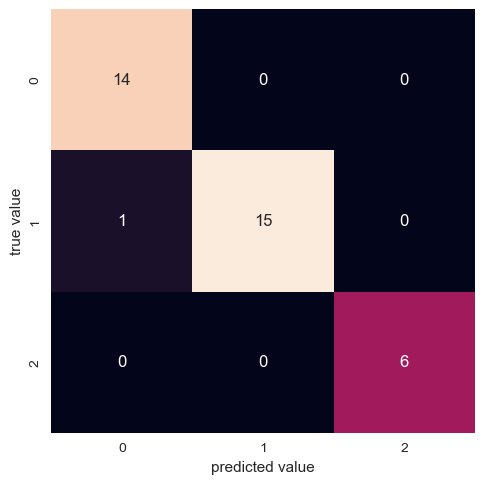

In [109]:
# TO DO: Print confusion matrix using a heatmap

from sklearn.metrics import confusion_matrix

mat = confusion_matrix(y_test, tree.predict(X_test))

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value')

In [110]:
# TO DO: Print classification report
from sklearn.metrics import classification_report

target_names = ['class 1', 'class 2', 'class 3']
print(classification_report(y_test, tree.predict(X_test), target_names=target_names))

              precision    recall  f1-score   support

     class 1       0.93      1.00      0.97        14
     class 2       1.00      0.94      0.97        16
     class 3       1.00      1.00      1.00         6

    accuracy                           0.97        36
   macro avg       0.98      0.98      0.98        36
weighted avg       0.97      0.97      0.97        36



### Questions (6 marks)
1. How do the training and validation accuracy change depending on the method used? Explain with values.
1. What are two reasons why the support vector machines model did not work as well as the tree-based model?
1. How many samples were incorrectly classified in step 5.2? 
1. In this case, is maximizing precision or recall more important? Why?

*YOUR ANSWERS HERE*

1. The training and validation accuracy for the decision SVC classifier was 0.698882 for training and 0.662808 for validation, while for Decision Tree was a training score of 0.994721 and validation score of 0.929310. This means the Decision tree by far was the best model for this dataset.
2. Support vector machines are more complex models compared to decidion trees which means they don't always perform better. For support vector machines to work properly, the type of kernel needs to be appropriate. It is also better for low-dimensional and high-dimensional data. In our case, the data was in between and the parameters (kernel, regularization) were not focused on so the model was not properly formulated for the data. Lastly, the initial definition of SVC that we have used only supports 2 classes. These factors are not important for decision trees, so that model worked a lot better.
3. Only 1 sample was incorrectly classified in the confusion matrix.
4. In this case, precision is more important than recall, since we are interested in classifying the wine correctly. We do not need to focus on minimizing false negatives for recall, since it is not important; rather, we want to minimize false positives so identification of the wine is correct.

### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

*DESCRIBE YOUR PROCESS HERE*

1. The source code was derived mainly from the lecture examples: Decision Trees, Decision Trees Examples and SVM. The only additional resource was to get the classification report, since that was not something we had done before. For this, scikit-learn documentation was used: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
2. The steps were completed in the order they were asked.
3. No generative AI was necessary since the lecture code and internet was simple enough to easily modify.
4. The only challenge faced was loading the wine data from the website. Prior to this, all datasets were extracted from scikit-learn but this time required some trial and error to upload the data properly with correct formatting and creating the target vector and feature matrix

## Part 3: Observations/Interpretation (3 marks)

Describe any pattern you see in the results. Relate your findings to what we discussed during lectures. Include data to justify your findings.


*ADD YOUR FINDINGS HERE*

For the decision tree, the training and validation accuracy was higher than for SVM. I though this to be a bit strange at first, since I thought SVM would perform better because it uses less features to create a decision boundary, according to the discussion. I though 13 features were little, but after performing the classification, I see that even this many features can be too much for the model and make it too computationally intensive. This time, for the decision tree, the model seemed to work very well and produced high scores. However, the difference between the training and testing set does indicate some overfitting of the model, causing high variance. The same can be true for the concrete example. The scores were much better than last lab but there might have been some overfitting and the models would benefit from regularization.

## Part 4: Reflection (2 marks)
Include a sentence or two about:
- what you liked or disliked,
- found interesting, confusing, challangeing, motivating
while working on this assignment.


*ADD YOUR THOUGHTS HERE*

I enjoyed working with the same dataset as last lab and trying more models on it to see which one was the best for that sample and what the reason might have been. I had some difficulty with the visualization part in Part 2, but in the end was able to decipher both the confusion matrix and the report. I had not read a 3x3 matrix before so this was a new aspect for me to learn in this lab.

## Part 5: Bonus Question (3 marks)

Repeat Part 2 and compare the support vector machines model used to `LinearSVC(max_iter=5000)`. Does using `LinearSVC` improve the results? Why or why not?

Is `LinearSVC` a good fit for this dataset? Why or why not?

In [118]:
# TO DO: ADD YOUR CODE HERE

from sklearn.svm import LinearSVC

# Creating a training and testing split (train - 80%, test - 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=0)

# Instantiating models
svc = LinearSVC(max_iter=5000)

# Fitting models
svc.fit(X_train, y_train)

# Creating validation model
# SVC
scores_svc = cross_validate(svc, X_train, y_train, cv=5, 
                        scoring='accuracy',
                       return_train_score=True)

# Creating data for training and validation
for label_pair in [ ('train_score', 'train_score')]:
    train1 = (scores_svc[label_pair[0]].mean())
for label_pair in [ ('test_score', 'validation_score')]:
    val1 = (scores_svc[label_pair[0]].mean())

# Creating the Dataframe
data = {'Data Size': [X.shape],
            'Training Accuracy': [train1],
            'Validation Accuracy': [val1]}
pd.DataFrame(data)


C:\Users\mohsi\miniconda3\envs\ensf-ml\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\mohsi\miniconda3\envs\ensf-ml\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\mohsi\miniconda3\envs\ensf-ml\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\mohsi\miniconda3\envs\ensf-ml\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\mohsi\miniconda3\envs\ensf-ml\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` wi

,Data Size,Training Accuracy,Validation Accuracy
0,"(178, 13)",0.91728,0.894581


*ANSWER HERE*

Yes, using LinearSVC did improve the scores by a lot. The testing score is now 0.91728 and validation score is 0.894581. This might be because the initial definition of SVC, as we have done, does not support multi-class classificaitons. LinearSVC, on the other hand, does support this, which might be why it yielded a much higher training and accuracy score. All three classes could be classified here.